출처 : https://gils-lab.tistory.com/118

# [데이터 코딩테스트 대비 #1] 미세먼지 농도

## 문제 
PM10_seoul.csv는 12월 1일 1시부터 8월 24일 24시까지 한 시간 마다 측정한 미세먼지 농도(PM-10) 데이터이다.

date컬럼은 측정 시각(YYYY-MM-DD:HH)를 나타내며, PM-10은 미세먼지 농도를 나타낸다. 

이 데이터를 활용하여 아래에 답하시오.


1. 시간에 따른 미세먼지 농도를 적절한 그래프로 시각화하세요. 단, x축 이름은 date, y축 이름은 PM-10이어야 합니다.
   
2. 시간대별 평균 미세먼지 농도를 계산하세요. 즉, t시(t=1,2,...,24)의 평균 농도를 구하시오.
   
3. 시점 t의 미세먼지 농도를 시점 t-1, t-2, t-3, t-4의 농도를 이용하여 예측하는 모델을 학습하기 위한 데이터를 구성하세요. 
    예를 들어, 8일 24시의 미세먼지 농도를 8일 20,21,22,23시의 농도로 예측할 수 있도록 구성합니다.
    
4. (3)에서 만든 데이터를 활용하여 선형 회귀 모델을 구성하고, 학습시키세요.

In [1]:
# import modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression

In [2]:
# load data
data = pd.read_csv('./data/PM10_seoul.csv')
data.head()

,date,PM-10
0,2022-12-08:24,22.0
1,2022-12-08:23,22.0
2,2022-12-08:22,25.0
3,2022-12-08:21,23.0
4,2022-12-08:20,20.0


In [4]:
# 데이터 개요
"""
데이터 전체에 195 rows가 존재하지만, 두 컬럼은 192개의 non-null 데이터를 가짐.
즉, 두 컬럼 모두 null인 컬럼이 3개 존재.
"""
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    192 non-null    object 
 1   PM-10   192 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


In [6]:
# 기초통계량
data.describe()

,PM-10
count,192.000000
mean,24.572917
std,9.278410
min,9.000000
25%,18.000000
50%,23.000000
75%,30.000000
max,61.000000


In [9]:
"""
마지막 3개의 행이 Null값을 가지는 걸 확인 
idx = 192,193,194
"""
data.isna()

,date,PM-10
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
190,False,False
191,False,False
192,True,True
193,True,True


In [10]:
data.tail()

,date,PM-10
190,2022-12-01:02,12.0
191,2022-12-01:01,15.0
192,NaN,NaN
193,NaN,NaN
194,NaN,NaN


In [11]:
# 결측치 제거 
data_dropna = data.dropna()

In [13]:
data_dropna.tail()

,date,PM-10
187,2022-12-01:05,15.0
188,2022-12-01:04,15.0
189,2022-12-01:03,14.0
190,2022-12-01:02,12.0
191,2022-12-01:01,15.0


### 1. 시간에 따른 미세먼지 농도를 적절한 그래프로 시각화하세요. 단, x축 이름은 date, y축 이름은 PM-10이어야 합니다.

In [14]:
help(sns.lineplot)

Help on function lineplot in module seaborn.relational:

lineplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, units=None, weights=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, orient='x', sort=True, err_style='band', err_kws=None, legend='auto', ci='deprecated', ax=None, **kwargs)
    Draw a line plot with possibility of several semantic groupings.

    The relationship between `x` and `y` can be shown for different subsets
    of the data using the `hue`, `size`, and `style` parameters. These
    parameters control what visual semantics are used to identify the different
    subsets. It is possible to show up to three dimensions independently by
    using all three semantic types, but this style of plot can be hard to
    interpret and is often ineffective. Using redundant semantics (i.e. both
    `hue` and `st

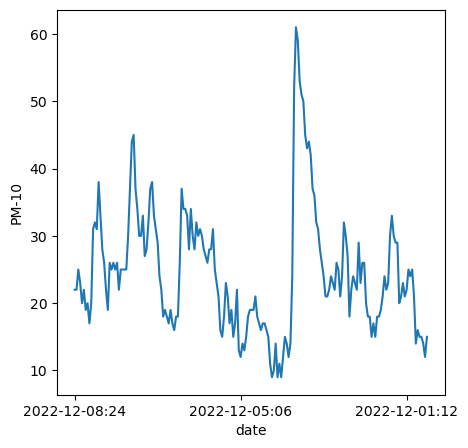

In [25]:
fig = plt.figure(figsize=(5,5))
ax1 = sns.lineplot(data_dropna, x='date', y='PM-10')
ax1.set_xticks(range(len(data_dropna)))
ax1.set_xticks(range(0, len(data_dropna)+1, 90))

([<matplotlib.axis.XTick at 0x165b9b200>,
 [Text(0, 0, '2022-12-08:24'), Text(100, 0, '2022-12-04:20')])

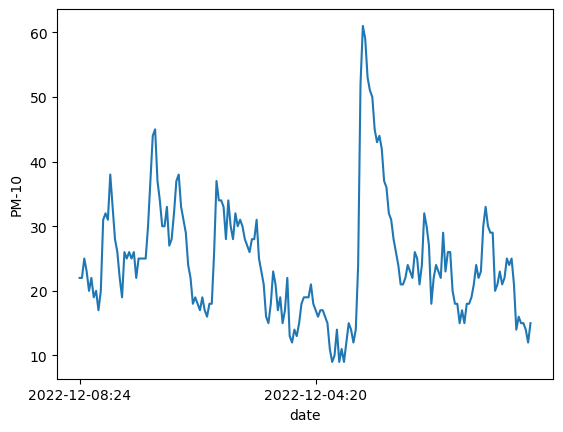

In [30]:
plt.plot(data_dropna['date'], data_dropna['PM-10'])
plt.xlabel('date')
plt.ylabel('PM-10')
plt.xticks(range(0,len(data_dropna), 100))

### 2. 시간대별 평균 미세먼지 농도를 계산하세요. 즉, t시(t=1,2,...,24)의 평균 농도를 구하시오.

In [31]:
data = data_dropna.copy()

In [32]:
data.tail()

,date,PM-10
187,2022-12-01:05,15.0
188,2022-12-01:04,15.0
189,2022-12-01:03,14.0
190,2022-12-01:02,12.0
191,2022-12-01:01,15.0


In [33]:
data['hour'] = data.date.apply(lambda x: x.split(':')[1])

In [34]:
data.head()

,date,PM-10,hour
0,2022-12-08:24,22.0,24
1,2022-12-08:23,22.0,23
2,2022-12-08:22,25.0,22
3,2022-12-08:21,23.0,21
4,2022-12-08:20,20.0,20


In [35]:
data.groupby('hour')['PM-10'].mean()

hour
01    25.875
02    22.000
03    21.000
04    21.000
05    21.375
06    21.375
07    20.250
08    22.375
09    23.125
10    22.750
11    27.000
12    25.125
13    25.250
14    28.000
15    24.500
16    24.500
17    26.500
18    25.500
19    25.125
20    27.000
21    28.125
22    28.125
23    27.250
24    26.625
Name: PM-10, dtype: float64

In [36]:

avg_PM10_by_hour =data.groupby('hour')['PM-10'].mean().reset_index()

In [37]:
avg_PM10_by_hour

,hour,PM-10
0,01,25.875
1,02,22.000
2,03,21.000
3,04,21.000
4,05,21.375
5,06,21.375
6,07,20.250
7,08,22.375
8,09,23.125
9,10,22.750


### 3. 시점 t의 미세먼지 농도를 시점 t-1, t-2, t-3, t-4의 농도를 이용하여 예측하는 모델을 학습하기 위한 데이터를 구성하세요. 
    예를 들어, 8일 24시의 미세먼지 농도를 8일 20,21,22,23시의 농도로 예측할 수 있도록 구성합니다.

In [38]:
data

,date,PM-10,hour
0,2022-12-08:24,22.0,24
1,2022-12-08:23,22.0,23
2,2022-12-08:22,25.0,22
3,2022-12-08:21,23.0,21
4,2022-12-08:20,20.0,20
...,...,...,...
187,2022-12-01:05,15.0,05
188,2022-12-01:04,15.0,04
189,2022-12-01:03,14.0,03
190,2022-12-01:02,12.0,02


In [45]:
"""
columns = ['t-4', 't-3', 't-2', 't-1', 't']
forecast_data = pd.Data
"""

total_data = []
for t in range(len(data)):
    tmp_data = []
    if t-4 < 0:
        tmp_data.append(None)
    else :
        tmp_data.append(data.loc[t-4, ('PM-10')])
    if t-3 < 0:
        tmp_data.append(None)
    else : 
        tmp_data.append(data.loc[t-3, ('PM-10')])
    if t-2 < 0:
        tmp_data.append(None)
    else : 
        tmp_data.append(data.loc[t-2, ('PM-10')])
    if t-1 < 0:
        tmp_data.append(None)
    else : 
        tmp_data.append(data.loc[t-1, ('PM-10')])
    tmp_data.append(data.loc[t, 'PM-10'])
    total_data.append(tmp_data)
    

In [46]:
total_data

[[None, None, None, None, 22.0],
 [None, None, None, 22.0, 22.0],
 [None, None, 22.0, 22.0, 25.0],
 [None, 22.0, 22.0, 25.0, 23.0],
 [22.0, 22.0, 25.0, 23.0, 20.0],
 [22.0, 25.0, 23.0, 20.0, 22.0],
 [25.0, 23.0, 20.0, 22.0, 19.0],
 [23.0, 20.0, 22.0, 19.0, 20.0],
 [20.0, 22.0, 19.0, 20.0, 17.0],
 [22.0, 19.0, 20.0, 17.0, 20.0],
 [19.0, 20.0, 17.0, 20.0, 31.0],
 [20.0, 17.0, 20.0, 31.0, 32.0],
 [17.0, 20.0, 31.0, 32.0, 31.0],
 [20.0, 31.0, 32.0, 31.0, 38.0],
 [31.0, 32.0, 31.0, 38.0, 33.0],
 [32.0, 31.0, 38.0, 33.0, 28.0],
 [31.0, 38.0, 33.0, 28.0, 26.0],
 [38.0, 33.0, 28.0, 26.0, 22.0],
 [33.0, 28.0, 26.0, 22.0, 19.0],
 [28.0, 26.0, 22.0, 19.0, 26.0],
 [26.0, 22.0, 19.0, 26.0, 25.0],
 [22.0, 19.0, 26.0, 25.0, 26.0],
 [19.0, 26.0, 25.0, 26.0, 25.0],
 [26.0, 25.0, 26.0, 25.0, 26.0],
 [25.0, 26.0, 25.0, 26.0, 22.0],
 [26.0, 25.0, 26.0, 22.0, 25.0],
 [25.0, 26.0, 22.0, 25.0, 25.0],
 [26.0, 22.0, 25.0, 25.0, 25.0],
 [22.0, 25.0, 25.0, 25.0, 25.0],
 [25.0, 25.0, 25.0, 25.0, 30.0],
 [25.0, 25

In [47]:
help(pd.DataFrame)

Help on class DataFrame in module pandas.core.frame:

class DataFrame(pandas.core.generic.NDFrame, pandas.core.arraylike.OpsMixin)
 |  DataFrame(data=None, index: 'Axes | None' = None, columns: 'Axes | None' = None, dtype: 'Dtype | None' = None, copy: 'bool | None' = None) -> 'None'
 |
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, dataclass or list-like objects. If
 |      data is a dict, column order follows insertion-order. If a dict contains Series
 |      which have an index defined, it is aligned by its index. This alignment also
 |      occurs if data is a Se

In [49]:
forecast_data = pd.DataFrame(
    total_data
)

In [51]:
forecast_data.columns = ['t-4', 't-3', 't-2', 't-1', 't']

In [52]:
forecast_data

,t-4,t-3,t-2,t-1,t
0,NaN,NaN,NaN,NaN,22.0
1,NaN,NaN,NaN,22.0,22.0
2,NaN,NaN,22.0,22.0,25.0
3,NaN,22.0,22.0,25.0,23.0
4,22.0,22.0,25.0,23.0,20.0
...,...,...,...,...,...
187,25.0,21.0,14.0,16.0,15.0
188,21.0,14.0,16.0,15.0,15.0
189,14.0,16.0,15.0,15.0,14.0
190,16.0,15.0,15.0,14.0,12.0


### 4. (3)에서 만든 데이터를 활용하여 선형 회귀 모델을 구성하고, 학습시키세요.

In [53]:
import sklearn.model_selection


help(sklearn.model_selection.GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |
 |  Exhaustive search over specified parameter values for an estimator.
 |
 |  Important members are fit, predict.
 |
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |
 |  Read more in the :ref:`User Guide <grid_search>`.
 |
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either estimator needs

In [54]:
# 학습 데이터 전처리 
"""
1. 결측치 드롭
2. 스케일링?(optional)
3. X, y 분리
"""

# 결측치 드롭 
forecast_data_dropna = forecast_data.dropna()

In [55]:
forecast_data_dropna

,t-4,t-3,t-2,t-1,t
4,22.0,22.0,25.0,23.0,20.0
5,22.0,25.0,23.0,20.0,22.0
6,25.0,23.0,20.0,22.0,19.0
7,23.0,20.0,22.0,19.0,20.0
8,20.0,22.0,19.0,20.0,17.0
...,...,...,...,...,...
187,25.0,21.0,14.0,16.0,15.0
188,21.0,14.0,16.0,15.0,15.0
189,14.0,16.0,15.0,15.0,14.0
190,16.0,15.0,15.0,14.0,12.0


In [56]:
train_X = forecast_data_dropna.drop(columns=['t'])
train_y = forecast_data_dropna['t']

In [57]:
train_X

,t-4,t-3,t-2,t-1
4,22.0,22.0,25.0,23.0
5,22.0,25.0,23.0,20.0
6,25.0,23.0,20.0,22.0
7,23.0,20.0,22.0,19.0
8,20.0,22.0,19.0,20.0
...,...,...,...,...
187,25.0,21.0,14.0,16.0
188,21.0,14.0,16.0,15.0
189,14.0,16.0,15.0,15.0
190,16.0,15.0,15.0,14.0


In [58]:
train_y

4      20.0
5      22.0
6      19.0
7      20.0
8      17.0
       ... 
187    15.0
188    15.0
189    14.0
190    12.0
191    15.0
Name: t, Length: 188, dtype: float64

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_squared_log_error

def rmse(y, y_hat):
    import numpy as np
    return np.sqrt(mean_squared_error(y,y_hat))

model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression()

In [62]:
model.coef_

array([-0.09702607,  0.12364112, -0.30445736,  1.14335596])

In [63]:
preds = model.predict(train_X)

In [66]:
preds

array([22.56536907, 20.11513927, 22.77686284, 18.56100902, 21.15609752,
       16.85659678, 21.61475608, 32.81035012, 31.26667664, 30.88783739,
       38.25214082, 30.18349228, 26.9515132 , 24.88970003, 20.79211568,
       18.81772537, 27.43407686, 24.17670027, 26.78107963, 24.5304427 ,
       26.19892321, 21.10037482, 25.96893934, 24.46397671, 25.22300434,
       24.93192613, 30.64870593, 37.12991083, 43.62040658, 43.01291846,
       33.74791875, 32.19796841, 27.45176166, 29.07487632, 32.30145794,
       24.91605437, 28.25707787, 31.49311943, 36.69786731, 36.71647484,
       30.92533899, 29.79942466, 27.40639581, 22.53637886, 21.71872367,
       17.33006111, 19.92909464, 18.18076899, 17.85361579, 20.22411789,
       17.30187619, 17.11174327, 19.26157818, 18.72307447, 28.21423045,
       38.16143495, 32.371465  , 33.86868083, 31.28711474, 26.16587052,
       34.42465198, 27.50330444, 27.66139903, 31.76701671, 28.40329738,
       30.84418468, 28.76098484, 27.09642354, 26.34131512, 25.35

In [65]:
print(f'RMSE {rmse(train_y, preds)}')

RMSE 3.8968850229767833


Text(0.5, 0, 'PM-10')

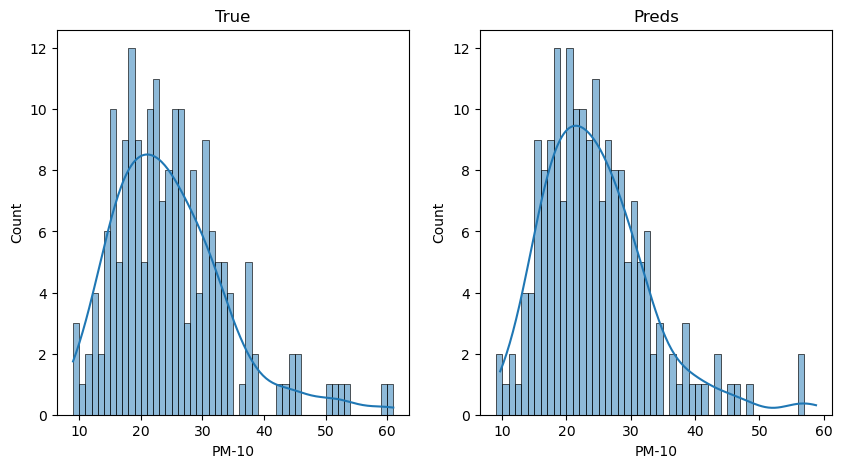

In [78]:
# true와 preds 분포 시각화 
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.histplot(train_y, bins=range(int(train_y.min()), int(train_y.max())+1), kde=True)
ax1.set_title('True')
ax1.set_xlabel('PM-10')

ax2 = fig.add_subplot(1,2,2)
ax2 = sns.histplot(preds, bins=range(int(preds.min()), int(preds.max())+1), kde=True)
ax2.set_title('Preds')
ax2.set_xlabel('PM-10')

Text(0.5, 0, 't')

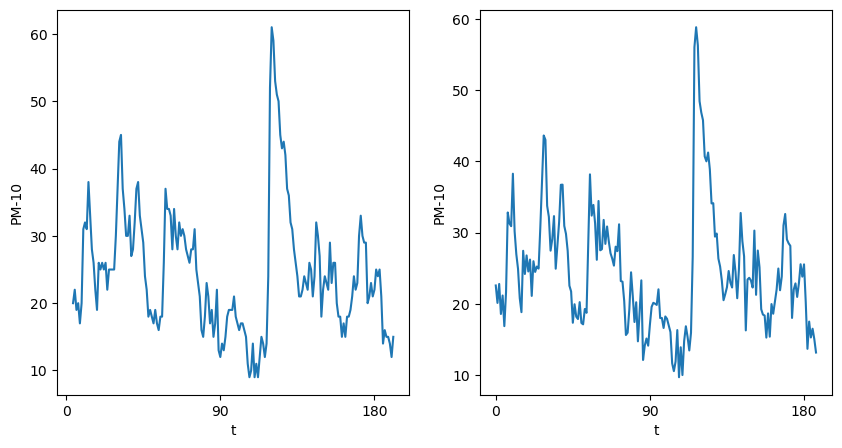

In [77]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.lineplot(train_y)
ax1.set_xticks(range(len(train_y)))
ax1.set_xticks(range(0, len(train_y)+1, 90))
ax1.set_ylabel('PM-10')
ax1.set_xlabel('t')

ax2 = fig.add_subplot(1,2,2)
ax2 = sns.lineplot(preds)
ax2.set_xticks(range(len(preds)))
ax2.set_xticks(range(0, len(preds)+1, 90))
ax2.set_ylabel('PM-10')
ax2.set_xlabel('t')